## 연구
K-mean은 값들의 평균을 이용하는 알고리즘이기에 수치형 데이터에 더 적합하다.  
범주형 데이터를 군집화 하기위해서 K-Prototype 알고리즘을 써봐도 될 것 같다.

In [ ]:
import numpy as np

question = ["1", "2", "3", "4", "5"]
form = [
    [0,1,1,0,1]
]

forms = np.random.randint(0,4,(40, 10)) / 3
forms

array([[0.66666667, 0.33333333, 1.        , 0.        , 0.66666667,
        0.66666667, 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 1.        , 0.33333333, 1.        ,
        1.        , 1.        , 0.33333333, 0.        , 0.        ],
       [0.33333333, 0.66666667, 0.33333333, 0.66666667, 0.        ,
        0.33333333, 1.        , 0.66666667, 1.        , 0.66666667],
       [0.66666667, 0.        , 0.        , 0.66666667, 0.66666667,
        0.        , 0.33333333, 0.        , 1.        , 0.66666667],
       [0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.33333333, 1.        ],
       [0.33333333, 0.        , 1.        , 0.33333333, 0.        ,
        0.66666667, 0.66666667, 0.        , 0.66666667, 0.66666667],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 1.        ,
        0.66666667, 0.33333333, 0.66666667, 0.66666667, 0.33333333],
       [1.        , 0.        , 0.6666666

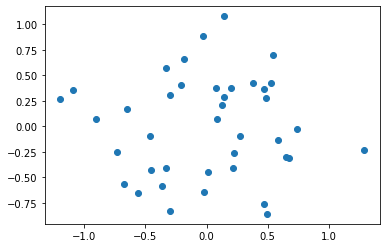

[0.20773124 0.16715466]


In [ ]:
# 2D로 만들어서 시각화 하기
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
form_2d = pca.fit_transform(forms)
plt.scatter(form_2d.T[0], form_2d.T[1])
plt.show()
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=4, algorithm='auto')
model.fit(forms)
print(model.cluster_centers_)

[[0.42424242 0.45454545 0.09090909 0.36363636 0.60606061 0.36363636
  0.42424242 0.27272727 0.75757576 0.48484848]
 [0.54545455 0.45454545 0.72727273 0.60606061 0.72727273 0.24242424
  0.48484848 0.45454545 0.09090909 0.06060606]
 [0.37037037 0.33333333 0.77777778 0.51851852 0.11111111 0.48148148
  0.81481481 0.37037037 0.77777778 0.7037037 ]
 [0.81481481 0.66666667 0.44444444 0.48148148 0.25925926 0.66666667
  0.55555556 0.77777778 0.25925926 0.81481481]]


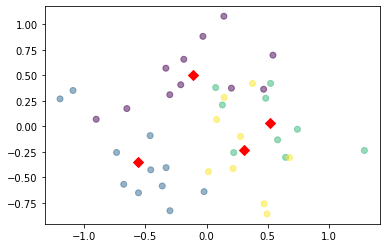

In [ ]:
import pandas as pd

pca_data = pd.DataFrame(form_2d, columns=['PCA_x', 'PCA_y'])
km_data = pd.DataFrame(model.predict(forms), columns=['predict'])

plt.scatter(pca_data['PCA_x'], pca_data['PCA_y'], c=km_data['predict'], alpha=0.5)
centers = pd.DataFrame(pca.transform(model.cluster_centers_), columns=['PCA_x', 'PCA_y'])

plt.scatter(centers['PCA_x'], centers['PCA_y'], s=50, marker='D', c='r')
plt.show()

In [ ]:
def process(form):
    return int(model.predict(np.array([form])/4)[0])
process([0,1,2,3,2,1,2,1,2,1])

0

In [ ]:
!pip install flask
!pip install flask-ngrok
!pip install flask_cors

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, redirect, url_for, render_template, jsonify
from flask_cors import CORS, cross_origin

# 유효성 검증 로직 추가해야함

app = Flask(__name__)
run_with_ngrok(app)

app.config['CORS_HEADERS'] = 'Content-Type'

CORS(app)
CORS(app, resources={r'*': {'origins': '*'}})

@app.route("/")
def index():
    # return render_template('index.html')
    return "<h1>Running Flask on Google Colab!</h1>"

@app.route("/form", methods=['GET', 'POST'])
def form():
    if request.method == 'GET':
        return "<h1>form PAGE</h1>"
    elif request.method == 'POST':
        answer = request.json['answer']
        print(answer)
        if answer != None:
            utype = process(answer)
            return jsonify({'type': utype})

@app.route("/report/<utype>", methods=['GET', 'POST'])
def report(utype):
    if request.method == 'GET':
        return "<h1>form PAGE</h1>"
    elif request.method == 'POST':
        return jsonify({
            'type': utype,
            'name': 'test type'
        })

@app.route("/types")
def types():
    if request.method == 'GET':
        return "<h1>타입 전체보기</h1>"

@app.route("/types/<utype>")
def types_type(utype):
    if request.method == 'GET':
        return "<h1>타입 상세보기</h1>"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://587b529df178.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Nov/2020 21:23:29] "OPTIONS /form HTTP/1.1" 200 -
127.0.0.1 - - [18/Nov/2020 21:23:29] "POST /form HTTP/1.1" 200 -


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


127.0.0.1 - - [18/Nov/2020 21:23:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Nov/2020 21:23:58] "OPTIONS /form HTTP/1.1" 200 -
127.0.0.1 - - [18/Nov/2020 21:23:59] "POST /form HTTP/1.1" 200 -


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


127.0.0.1 - - [18/Nov/2020 21:23:59] "GET /report/0 HTTP/1.1" 200 -
127.0.0.1 - - [18/Nov/2020 21:24:00] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [18/Nov/2020 21:24:02] "GET /report/0 HTTP/1.1" 200 -
